In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def add_third_dimension_and_repeat(point_cloud, n_repeats):
    """Add a third dimension to the point cloud and repeat it n_repeats times."""
    z = 3*np.arange(n_repeats)
    z = np.repeat(z, point_cloud.shape[0])
    z = z[:,None]
    point_cloud = np.tile(point_cloud, (n_repeats, 1))
    point_cloud = np.concatenate((point_cloud, z), axis=1)
    return point_cloud


def generate_rotations_3d(point_cloud, alpha, beta, gamma):
    """Generate rotated point clouds."""
    # Rotation matrices
    R_alpha = np.array([[np.cos(alpha), -np.sin(alpha), 0],
                        [np.sin(alpha), np.cos(alpha), 0],
                        [0, 0, 1]])
    R_beta = np.array([[1, 0, 0],
                       [0, np.cos(beta), -np.sin(beta)],
                       [0, np.sin(beta), np.cos(beta)]])
    R_gamma = np.array([[np.cos(gamma), 0, np.sin(gamma)],
                        [0, 1, 0],
                        [-np.sin(gamma), 0, np.cos(gamma)]])
    # Rotate point cloud
    return np.dot(np.dot(np.dot(point_cloud, R_alpha), R_beta), R_gamma)

In [3]:
A = np.array(
                [
                    [0,0],
                    [1/4, 1],
                    [1/2,2],
                    [3/4, 1],
                    [1,0]
                ]

)

In [4]:
B = np.array(
                [
                    [0,0],
                    [1,1/2],
                    [0, 1],
                    [1, 3/2],
                    [0, 2]
                ]

)

In [5]:
C = np.array(
                [
                    [1,0],
                    [0,0],
                    [0,1],
                    [0,2],
                    [1,2]
                ]

)

In [6]:
D = np.array(
                [
                    [0,0],
                    [2/3,0],
                    [1,1],
                    [2/3,2],
                    [0,2]
                ]

)

In [7]:
E = np.array(
                [
                    [1,0],
                    [0,0],
                    [1,1],
                    [0,2],
                    [1,2],
                    
                ]

)

In [8]:
F = np.array(
                [
                    [0,0],
                    [0,1],
                    [0,2],
                    [1,2],
                    [1,1]
                ]

)

In [9]:
a_indices = np.array([0,1,2,3,4,3,1])

In [10]:
b_indices = np.array([0,1,2,3,4,2,0])

In [11]:
c_indices = np.array([0,1,2,3,4])

In [12]:
d_indices = np.array([0,1,2,3,4,0])

In [13]:
e_indices = np.array([0,1,2,3,4,])

In [14]:
f_indices = np.array([0,1,2,3,2,1,4])

In [15]:
colors = ['blue', 'black', 'green', 'purple', 'orange']#, 'brown']

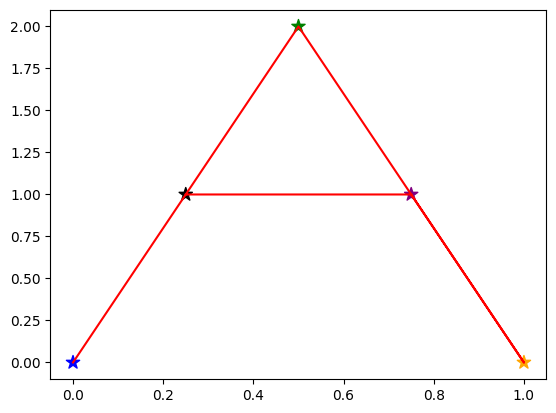

In [16]:
plt.plot(A[a_indices,0], A[a_indices,1], 'r')
plt.scatter(A[:,0], A[:,1], c = colors, marker='*', s=100)

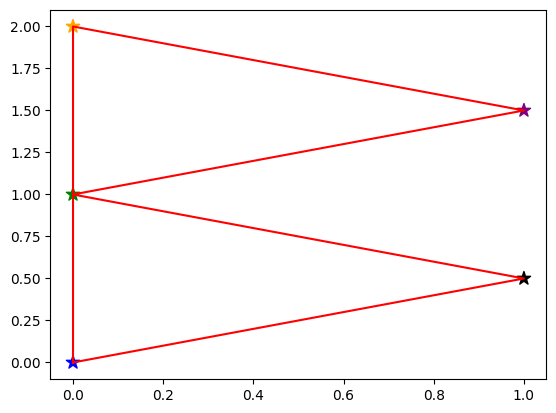

In [17]:
plt.plot(B[b_indices,0], B[b_indices,1], 'r')
plt.scatter(B[:,0], B[:,1], c = colors, marker='*', s=100)

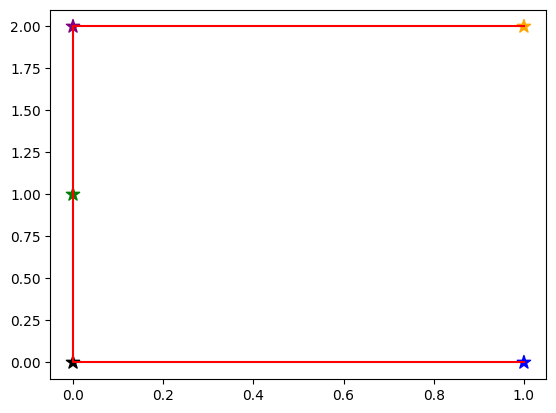

In [18]:
plt.plot(C[c_indices,0], C[c_indices,1], 'r')
plt.scatter(C[:,0], C[:,1], c = colors, marker='*', s=100)

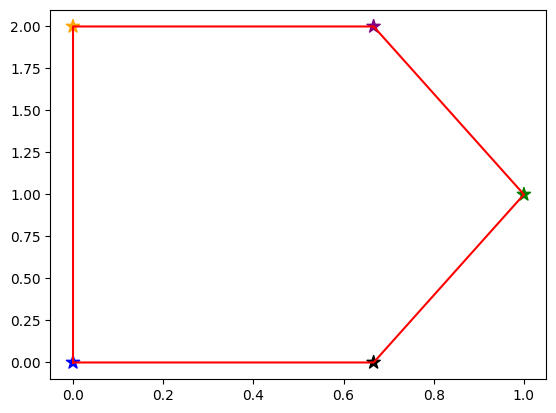

In [19]:
plt.plot(D[d_indices,0], D[d_indices,1], 'r')
plt.scatter(D[:,0], D[:,1], c = colors, marker='*', s=100)

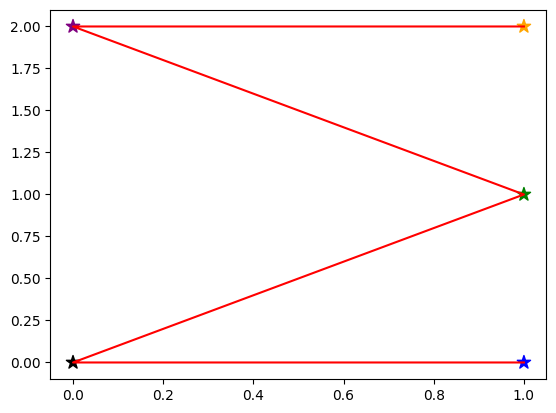

In [20]:
plt.plot(E[e_indices,0], E[e_indices,1], 'r')
plt.scatter(E[:,0], E[:,1], c = colors, marker='*', s=100)

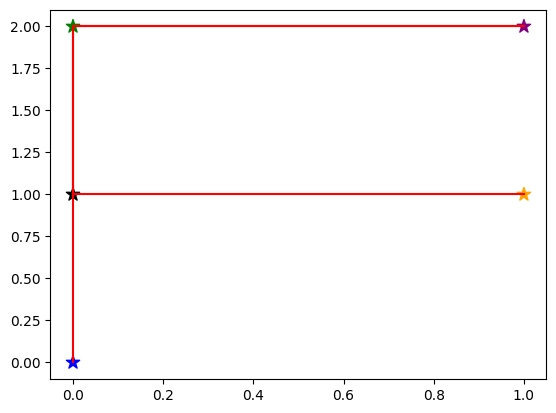

In [21]:
plt.plot(F[f_indices,0], F[f_indices,1], 'r')
plt.scatter(F[:,0], F[:,1], c = colors, marker='*', s=100)

In [22]:
repeated_A = add_third_dimension_and_repeat(A, 2)

In [23]:
repeated_A

array([[0.  , 0.  , 0.  ],
       [0.25, 1.  , 0.  ],
       [0.5 , 2.  , 0.  ],
       [0.75, 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 3.  ],
       [0.25, 1.  , 3.  ],
       [0.5 , 2.  , 3.  ],
       [0.75, 1.  , 3.  ],
       [1.  , 0.  , 3.  ]])

In [24]:
dataset_size = 6000

In [25]:
dataset_np = []

In [26]:
features = np.eye(5)

In [27]:
for i in range(dataset_size):
    class_label = i//1000
    repeats_numbers = np.random.randint(1, 5)
    random_shift = np.random.rand(3)
    features_rep = np.tile(features, (repeats_numbers, 1))
    if class_label == 0:
        repeated_A = add_third_dimension_and_repeat(A, repeats_numbers)
        rotated_A = generate_rotations_3d(repeated_A, np.random.uniform(0, 2*np.pi), np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi))
        rotated_A = rotated_A + random_shift[None, :]
        # all_feat = np.concatenate((rotated_A, features_rep), axis=1)
        dataset_np.append((rotated_A, features_rep, class_label))
        
    elif class_label == 1:
        repeated_B = add_third_dimension_and_repeat(B, repeats_numbers)
        rotated_B = generate_rotations_3d(repeated_B, np.random.uniform(0, 2*np.pi), np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi))
        rotated_B = rotated_B + random_shift[None, :]
        # all_feat = np.concatenate((rotated_B, features_rep), axis=1)
        dataset_np.append((rotated_B, features_rep, class_label))
    elif class_label == 2:
        repeated_C = add_third_dimension_and_repeat(C, repeats_numbers)
        rotated_C = generate_rotations_3d(repeated_C, np.random.uniform(0, 2*np.pi), np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi))
        rotated_C = rotated_C + random_shift[None, :]
        # all_feat = np.concatenate((rotated_C, features_rep), axis=1)
        dataset_np.append((rotated_C, features_rep, class_label))
    elif class_label == 3:
        repeated_D = add_third_dimension_and_repeat(D, repeats_numbers)
        rotated_D = generate_rotations_3d(repeated_D, np.random.uniform(0, 2*np.pi), np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi))
        rotated_D = rotated_D + random_shift[None, :]
        # all_feat = np.concatenate((rotated_D, features_rep), axis=1)
        dataset_np.append((rotated_D, features_rep, class_label))
    elif class_label == 4:
        repeated_E = add_third_dimension_and_repeat(E, repeats_numbers)
        rotated_E = generate_rotations_3d(repeated_E, np.random.uniform(0, 2*np.pi), np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi))
        rotated_E = rotated_E + random_shift[None, :]
        # all_feat = np.concatenate((rotated_E, features_rep), axis=1)
        dataset_np.append((rotated_E, features_rep, class_label))
    elif class_label == 5:
        repeated_F = add_third_dimension_and_repeat(F, repeats_numbers)
        rotated_F = generate_rotations_3d(repeated_F, np.random.uniform(0, 2*np.pi), np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi))
        rotated_F = rotated_F + random_shift[None, :]
        # all_feat = np.concatenate((rotated_F, features_rep), axis=1)
        dataset_np.append((rotated_F, features_rep, class_label))
        

In [28]:
import torch
import torch_geometric
from torch_geometric.data import Data, InMemoryDataset

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
class CustomGraphDataset(InMemoryDataset):
    def __init__(self, root, data_list=None, transform=None, pre_transform=None):
        self.data_list = data_list
        super(CustomGraphDataset, self).__init__(root, transform, pre_transform)
        
        if data_list is not None:
            self.data, self.slices = self.collate(self.data_list)
        else:
            self.data, self.slices = torch.load(self.processed_paths[0])
            # data_list from data
            self.data_list = [Data(x=data.x, edge_index=data.edge_index, edge_attr=data.edge_attr, y=data.y) for data in self.data]

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        pass

    def process(self):
        if self.data_list is not None:
            self.data, self.slices = self.collate(self.data_list)
            torch.save((self.data, self.slices), self.processed_paths[0])

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

    def save(self):
        torch.save((self.data, self.slices), self.processed_paths[0])

In [30]:
data_list = []
for coords, features, label in dataset_np:
    x = torch.tensor(features, dtype=torch.float)#.view(-1, 1)  # Node features
    r = torch.tensor(coords, dtype=torch.float)  # Node coordinates
    y = torch.tensor([label], dtype=torch.long)  # Label
    # edge_index = torch.tensor([[0, 1], [1, 0]], dtype=torch.long)  # Dummy edge_index for example
    
    data = Data(x=x, r = r, y=y)
    data_list.append(data)


In [31]:
dataset = CustomGraphDataset(root = '/Users/zhemd/PointConvolution/data/toy_dataset', data_list = data_list)

In [32]:
dataset.save()

/usr/local/lib/python3.12/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [33]:
from torch_geometric.loader import DataLoader

In [34]:
# dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [35]:
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [36]:
for batch in dataloader:
    print(batch)

DataBatch(x=[180, 5], y=[16], r=[180, 3], batch=[180], ptr=[17])
DataBatch(x=[180, 5], y=[16], r=[180, 3], batch=[180], ptr=[17])
DataBatch(x=[205, 5], y=[16], r=[205, 3], batch=[205], ptr=[17])
DataBatch(x=[170, 5], y=[16], r=[170, 3], batch=[170], ptr=[17])
DataBatch(x=[205, 5], y=[16], r=[205, 3], batch=[205], ptr=[17])
DataBatch(x=[205, 5], y=[16], r=[205, 3], batch=[205], ptr=[17])
DataBatch(x=[205, 5], y=[16], r=[205, 3], batch=[205], ptr=[17])
DataBatch(x=[210, 5], y=[16], r=[210, 3], batch=[210], ptr=[17])
DataBatch(x=[230, 5], y=[16], r=[230, 3], batch=[230], ptr=[17])
DataBatch(x=[240, 5], y=[16], r=[240, 3], batch=[240], ptr=[17])
DataBatch(x=[215, 5], y=[16], r=[215, 3], batch=[215], ptr=[17])
DataBatch(x=[215, 5], y=[16], r=[215, 3], batch=[215], ptr=[17])
DataBatch(x=[215, 5], y=[16], r=[215, 3], batch=[215], ptr=[17])
DataBatch(x=[210, 5], y=[16], r=[210, 3], batch=[210], ptr=[17])
DataBatch(x=[210, 5], y=[16], r=[210, 3], batch=[210], ptr=[17])
DataBatch(x=[185, 5], y=[